# Behaviourplots
KPI:
- Cost of Illness
- Contaminated chicken meat
- DALY

TODO:
- better kinds of plots for the yearly KPIs (COI and Daly)
- fix ticks for plots of contaminated meat
- include base run

In [1]:
# What scenarios do u want plotted?
scenarios = ["base", "1", "11"]

In [2]:
#What's the name of ur file?
loc = "fe_data"

In [3]:
#What's ur policy called?
policy = "Fly exposure"

## Everything below only needs to be run

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")

In [5]:
namedict = {"base": "base",
            "1": "fart1",
            "2": "fart2",
            "3": "fart3",
            "4": "fart4",
            "5": "fart5",
            "6": "fart6",
            "7": "fart7",
            "8": "fart8",
            "9": "fart9",
            "10": "fart10",
            "11": "fart11",
            "12": "fart12"}

In [6]:
def processing(df):
    global scenarios, namedict
    df = df.loc[df.index.str.split("_").str[-1].isin(scenarios)].T
    df.columns = df.columns.to_series().apply(lambda value: namedict[value.split("_")[-1]])
    df.index =df.index.astype("float")
    return df
    
def coi_processing(df):
    df = processing(df)
    # get each year
    return df[df.index % 1 == 0].copy()

def daly_processing(df):
    return coi_processing(df)

def meat_processing(df):
    df = processing(df)
    #for truncation
    return df.groupby(np.arange(len(df))//4, as_index=False).mean()

In [7]:
# Because we like colour consistency
simulcmap = "viridis"
cmap = plt.cm.get_cmap(simulcmap, len(namedict))
cmapcolors = cmap(range(len(namedict)))
L = [list(cmapcolors[int(x)]) if x != "base" else list(cmapcolors[0]) for x in scenarios]
colors = np.array(L)

In [8]:
location = "../data/" + loc + ".txt"

data_df = pd.read_csv(location, delimiter="\t", dtype="string")

In [9]:
data_df = data_df.iloc[:, :-1]

In [10]:
# Ok, so as we all know Python is retarded when it comes to memory allocation, which means we have to resort ugly constructs like this
# C++ for the win
temp = data_df.iloc[:, 1:].applymap(lambda value: float(value.replace("M",'')) * 1000000 if "M" in value else value)

In [11]:
temp = temp.apply(pd.to_numeric)

In [12]:
data_df = pd.concat([data_df.iloc[:, 0], temp], axis=1)

In [13]:
data_df.set_index("Date", inplace=True)

## Cost of Illness

In [14]:
coi_df = pd.DataFrame(data_df.loc[data_df.index.str.contains("Cost of Illness")])

In [15]:
coi_df = coi_processing(coi_df)

In [25]:
coi_df,diff(axis)

Date,fart11,base,fart1
2020.0,0.0,0.0,0.0
2021.0,4318020.0,3925470.0,3925470.0
2022.0,24852400.0,22593100.0,22593100.0
2023.0,45334300.0,41213000.0,41213000.0
2024.0,64869200.0,58972000.0,58972000.0
2025.0,85211400.0,77464900.0,77464900.0
2026.0,104730000.0,95209200.0,95209200.0
2027.0,123719000.0,112472000.0,112472000.0
2028.0,142624000.0,129658000.0,129658000.0
2029.0,162139000.0,147399000.0,147399000.0


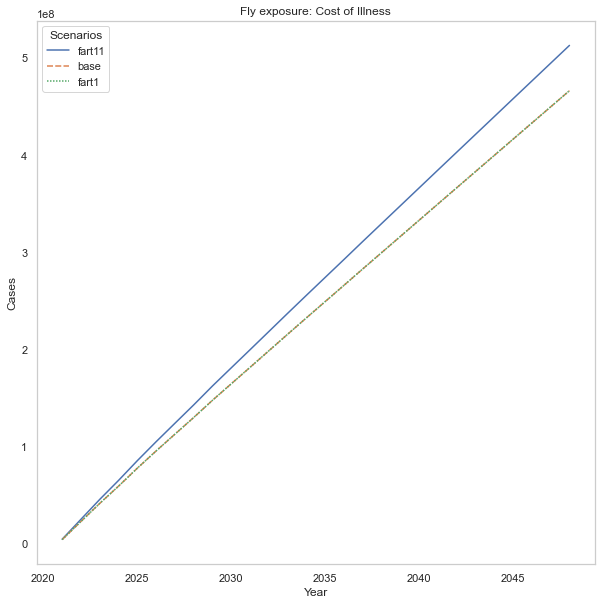

In [21]:
fig, ax = plt.subplots(figsize = (10,10)) 

sns.lineplot(data=coi_df[2021:], color=colors)

plt.xlabel('Year'); plt.ylabel('Cases')
plt.title(policy + ': Cost of Illness')
plt.legend(title="Scenarios")
ax.grid(False)

plt.savefig("../images/" + loc[:2] + "_coi.png", dpi=300, bbox_inches='tight')
plt.show()

## Contaminated chicken meat

In [22]:
meat_df = pd.DataFrame(data_df.loc[data_df.index.str.contains("contaminated meat")])

In [23]:
meat_df = meat_processing(meat_df)

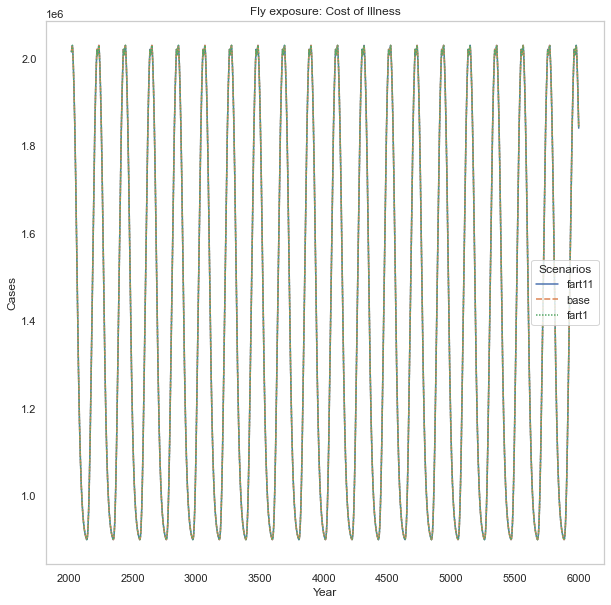

In [24]:
fig, ax = plt.subplots(figsize = (10,10)) 

sns.lineplot(data=meat_df[2021:], color=colors)

plt.xlabel('Year'); plt.ylabel('Cases')
plt.title(policy + ': Cost of Illness')
plt.legend(title="Scenarios")
ax.grid(False)
plt.savefig("../images/" + loc[:2] + "_meat.png", dpi=300, bbox_inches='tight')
plt.show()